# 아파트 분양가격 예측하기

## 목차
- [1. 주제](#1.-주제)
- [2. 연구문제](#2.-연구문제)
- [3. 연구방법](#3.-연구방법)
- [4. 데이터 수집](#4.-데이터-수집)
    - [4.1 데이터 수집 근거](#4.1-데이터-수집-근거)
    - [4.2 데이터 소개](#4.2-데이터-소개)
- [5. 데이터 전처리](#5.-데이터-전처리)
    - [5.1 결측치 제거](#5.1-결측치-제거)
    - [5.2 날짜형식 통일](#5.2-날짜형식-통일)
    - [5.3 데이터 병합](#5.3-데이터-병합)
- [6. 분석](#5.-분석)
    - [6.1 변수간 관계확인](#6.1-변수간-관계확인)
    - [6.2 선형회귀모형 및 성능평가](#6.2-선형회귀모형-및-성능평가)
- [7. 제언](#7.-제언)

## 1. 주제
- 본 프로젝트의 목적은 아파트 분양가격과 관련이 높을것으로 판단되는 데이터를 수집하여 분양가격을 예측할 수 있는 모형을 제안하는 것에 있다.

- 본 프로젝트는 FAST CAMPUS "데이터 사이언스 취업완성 SCHOOL" 의 **박두진 강사님** 지도하에 **최태병, 문다영, 손형진**이 팀을 이루어 진행하였다. 

[목차로 돌아가기](#목차)

## 2. 연구문제

- **연구문제 1** : 분양가격에 영향을 끼칠 것으로 예측되는 변수를 규명한다.
- **연구문제 2** : 지역별 분양가격의 차이를 확인한다.
- **연구문제 3** : 금리, 소비자물가지수, 산업생산지수, 부동산 정책, 지역, 아파트 규모와 관련되 데이터를 바탕으로 최적의 분양가격을 예측할 수 있는 회귀모델을 제안한다.

[목차로 돌아가기](#목차)

## 3. 연구방법

아래 그림은 본 프로젝트의 데이터 분석 과정을 보여준다.

![연구과정](images/process.png)

[목차로 돌아가기](#목차)

## 4. 데이터 수집

### 4.1 데이터 수집 근거

- 임대봉(2007)의 논문 "주택가격 상승요인과 대책방안"을 바탕으로 주택가격가 관계가 강할 것으로 예측되는 금리, 소비자물가지수, 산업생산지수, 주택정책을 강사님이 제안한 데이터에 추가하였다. 단, 주택정책의 경우 주택정책이 발표되는 시기에 "주택정책"이라는 검색이 많아 질 것으로 가정하여 구글 트랜드 데이터로 대체하였다. 아래 그림은 임대봉(2007)이 제안한 주택가격에 영향을 주는 독립변수별 오차수정모형 추정결과를 보여준다. 

![오차수정모형 추정결과(출처: 임대봉(2007, p23)](images/article.png)

[목차로 돌아가기](#목차)

### 4.2 데이터 소개

#### 과제 데이터
- house : 전국 평균 분양가격(2019년 9월)(출처 : [공공데이터 포탈(DATA)](https://www.data.go.kr/dataset/3035522/fileData.do))
  
#### 추가 데이터
- cofix : 금리  (출처 : [은행연합회소비자포탈](https://portal.kfb.or.kr/fingoods/cofix.php))
    - 은행들이 기준금리에 자금 조달 비용을 반영해 산출하는 주택담보대출 금리
- cpi : 소비자물가지수(출처 : [국가통계포탈(KOSIS)](http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J17002&conn_path=I2))
    - 일반 도시 가계가 소비생활을 영위하기 위하여 구입하는 소비재와 서비스의 가격변동을 나타내는 지수
    - 2017년 = 100 
- iaip : 산업생산지수  (출처 : [이나라지표](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=2838))
    - 우리나라 경제전체의 모든 산업을 대상으로 재화와 용역에 대한 생산활동의 흐름과 변화를 월별지수로 나타낸 것
    - 2015 년 = 100
- googletrend : 구글 "주택정책" 검색 비율 (출처 : [공공데이터 포탈(DATA)](https://www.data.go.kr/dataset/3035522/fileData.do))
    - 주택정책에 대한 이슈를 수치화하기 위한 데이터로 사용
    - 2015년 1월~ 2019년 9월 중 가장 검색을 많이했을때의 검색량 = 100


[목차로 돌아가기](#목차)

## 5. 데이터 전처리

### 5.1 결측치 제거

1. 열별 데이터 갯수 확인을 통해 결측치가 있다는 것을 확인

지역명|규모구분|연도|월|분양가격(㎡)
---|---|---|---|---
4080|4080|4080|4080|<span style="color:red">3827</span>

2. 결측치 뿐만 아니라 " ", "-", "," 을 제거한 후 데이터 갯수 확인

지역명|규모구분|연도|월|분양가격(㎡)
---|---|---|---|---
3802|3802|3802|3802|3802


In [1]:
house_df= pd.read_csv(
    "datas/주택도시보증공사_전국 평균 분양가격(2019년 9월).csv", encoding='euc-kr'
)
house_df.tail(2)

,지역명,규모구분,연도,월,분양가격(㎡)
4078,제주,전용면적 85㎡초과 102㎡이하,2019,9,NaN
4079,제주,전용면적 102㎡초과,2019,9,3601


In [2]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 5 columns):
지역명        4080 non-null object
규모구분       4080 non-null object
연도         4080 non-null int64
월          4080 non-null int64
분양가격(㎡)    3827 non-null object
dtypes: int64(2), object(3)
memory usage: 159.5+ KB


In [3]:
#NAN값 삭제
house_df=house_df[house_df["분양가격(㎡)"].notnull()]
# "  " 삭제
house_df=house_df[house_df["분양가격(㎡)"]!="  "]
#분양가격 숫자형 데이터로 바꾸기
# result["분양가격(㎡)"] = pd.to_numeric(result["분양가격(㎡)"], errors='coerce')
house_df["분양가격(㎡)"]=house_df["분양가격(㎡)"].apply(lambda x: x.replace(",",""))
house_df["분양가격(㎡)"]=house_df["분양가격(㎡)"].apply(lambda x: x.replace("-",""))
house_df=house_df[house_df["분양가격(㎡)"]!=""]

In [4]:
house_df["분양가격(㎡)"] = house_df["분양가격(㎡)"].astype(int)

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802 entries, 0 to 4079
Data columns (total 5 columns):
지역명        3802 non-null object
규모구분       3802 non-null object
연도         3802 non-null int64
월          3802 non-null int64
분양가격(㎡)    3802 non-null int32
dtypes: int32(1), int64(2), object(2)
memory usage: 163.4+ KB


[목차로 돌아가기](#목차)

### 5.2 날짜형식 통일

각 데이터의 날짜 형식을 **"201901"**과 같이 통일 하고자 한다.

데이터명|날짜 표시 형태|변환 방식|코드요약
---|---|---|---
[house](#house)|연도 : 2019/ 월 : 9|(연도 X 100) + 월|house_df["연도"]*100+df_1["월"]
[cofix](#cofix)|2019/05|replace 함수|cofix_df['대상월'].apply(lambda x: x.replace("/","")
[cpi](#cpi)|2019.01|기간 X 100|cpi_df["기간"]*100
[iaip](#iaip)|201901월|replace 함수|apply(lambda x: x.replace("월","")
[googletrend](#googletrend)|2019-01-04|데이터 슬라이싱|apply(lambda x: x[:4]+x[5:7])

#### house

In [6]:
# 연도, 월을 키값으로 다른 데이터 프레임들을 추가할 예정
# date 칼럼 생성
house_df["date"]=house_df["연도"]*100+house_df["월"]
house_df["date"]=house_df["date"].apply(str)
house_df.tail(2)

,지역명,규모구분,연도,월,분양가격(㎡),date
4077,제주,전용면적 60㎡초과 85㎡이하,2019,9,3884,201909
4079,제주,전용면적 102㎡초과,2019,9,3601,201909


#### cofix 

In [7]:
cofix= pd.read_csv(
 "datas/Cofix.csv", encoding='euc-kr',header=1
)
cofix_df=cofix[cofix.columns[1:3]]
cofix_df.sort_values(["대상월"], ascending=True, inplace=True)
cofix_df=cofix_df[cofix_df["대상월"]!="2014/12"]
cofix_df.reset_index(drop=True, inplace=True)
cofix_df.tail(2)

,대상월,신규취급액기준 COFIX
55,2019/08,1.52
56,2019/09,1.57


In [8]:
#날짜(대상월) 형식 맞추고 "date"로 칼럼명 변경
cofix_df['대상월']=cofix_df['대상월'].astype("str")
cofix_df['대상월']=cofix_df['대상월'].apply(lambda x: x.replace("/",""))
cofix_df.sort_values(["대상월"], ascending=True,inplace=True)
cofix_df.columns=["date",'신규취급액기준 COFIX']
cofix_df.tail(2)

,date,신규취급액기준 COFIX
55,201908,1.52
56,201909,1.57


#### cpi

In [9]:
# 2) 소비자물가지수 
cpi_df= pd.read_csv(
 "datas/cpi.csv", encoding='euc-kr',header=0
)
cpi_df.tail(2)

,기간,총지수,농축수산물,공업제품,전기·수도·가스,집세,공공서비스,개인서비스
55,2019.08,105.21,109.41,102.25,83.24,106.04,103.20,110.78
56,2019.09,105.57,115.36,102.47,88.98,106.06,101.67,110.41


In [10]:
# 날짜('date') 형식 맞추기
cpi_df=cpi_df[["기간","총지수"]]
cpi_df["기간"]=(cpi_df["기간"]*100) #2015.1, 2016.1 로 되어있는 기간이 있어서 수정
cpi_df.columns=["date",'CPI총지수'] #칼럼명 바꾸기
cpi_df['date']=cpi_df['date'].astype('int')
cpi_df['date']=cpi_df['date'].astype('str')
cpi_df.sort_values(["date"], ascending=True,inplace=True)
cpi_df.tail(2)

,date,CPI총지수
55,201908,105.21
56,201909,105.57


#### iaip 

In [11]:
iaip= pd.read_csv(
 "datas/iaip.csv", encoding='euc-kr', header=0)
iaip=iaip.T
iaip.columns=["전산업생산지수(원지수)","전월동기대비","광공업","건설업","서비스업","공공행정"] #나중에 뭘 쓸지 몰라서 우선 모두 표시
iaip=iaip.drop(iaip.index[0])
iaip_df=pd.DataFrame(iaip["전산업생산지수(원지수)"]).reset_index() 
iaip_df.tail(2)

,index,전산업생산지수(원지수)
55,201908월,105.4
56,201909월,105.3


In [12]:
#날짜(index) 형식 맞추기, 칼럼명 바꾸기
iaip_df['index']=iaip_df['index'].apply(lambda x: x.replace("월",""))
iaip_df.sort_values(["index"], ascending=True,inplace=True)
iaip_df.columns=["date",'전산업생산지수(원지수)'] #칼럼명 바꾸기
iaip_df.tail(2)

,date,전산업생산지수(원지수)
55,201908,105.4
56,201909,105.3


#### googletrend

In [13]:
googletrend_df = pd.read_csv(
 "datas/googletrend.csv", encoding='utf-8')
googletrend_df.tail(2)

,date,google
246,2019-09-22,29
247,2019-09-29,39


In [14]:
#날짜(index) 형식 맞추기
googletrend_df["date"]=googletrend_df["date"].apply(lambda x: x[:4]+x[5:7])
googletrend_df.head()

,date,google
0,201501,29
1,201501,29
2,201501,0
3,201501,87
4,201502,59


In [15]:
# 같은 date끼리 groupby 하기
googletrend_df=googletrend_df.groupby("date").agg("mean").reset_index()
googletrend_df.sort_values(["date"], ascending=True,inplace=True)
googletrend_df.head()

,date,google
0,201501,36.25
1,201502,22.25
2,201503,29.40
3,201504,53.75
4,201505,25.40


In [16]:
#추가 데이터는 모두 2015년 1월~2019년 9월까지의 연도-월별 데이터이다.
#따라서 길이가 모두 같은것을 확인
len(cofix_df),len(cpi_df), len(iaip_df), len(googletrend_df)

(57, 57, 57, 57)

[목차로 돌아가기](#목차)

### 5.3 데이터 병합

#### cofix[신규취급액] + cpi[총지수] + iaip[원지수] + googletrend[google] on date

In [17]:
#추가 데이터 merge (reduce함수로 누적해서 두개씩 merge)
# outer 병합을 하여 키값이 잘못입력되어있거나, 누락된 데이터는 없는지 검토
from functools import reduce
mg_ls=[cofix_df,cpi_df,iaip_df,googletrend_df]
add_df=reduce(lambda x,y: pd.merge(x,y,how='outer'),mg_ls)
add_df.tail(2)

,date,신규취급액기준 COFIX,CPI총지수,전산업생산지수(원지수),google
55,201908,1.52,105.21,105.4,15.5
56,201909,1.57,105.57,105.3,33.2


#### house + (cofix[신규취급액] + cpi[총지수] + iaip[원지수] + googletrend[google]) on date

In [18]:
#date를 키값으로 merge
master_table=pd.merge(house_df,add_df)
master_table.tail(2)

,지역명,규모구분,연도,월,분양가격(㎡),date,신규취급액기준 COFIX,CPI총지수,전산업생산지수(원지수),google
3800,제주,전용면적 60㎡초과 85㎡이하,2019,9,3884,201909,1.57,105.57,105.3,33.2
3801,제주,전용면적 102㎡초과,2019,9,3601,201909,1.57,105.57,105.3,33.2


[목차로 돌아가기](#목차)

## 6. 분석
- 특정 지역만 선택하여 지역별 아파트 분양가격 회귀분석 실시
- 독립변수: ["분양가격(㎡)","date","신규취급액기준 COFIX","CPI총지수","전산업생산지수(원지수)","google"]
- 종속변수: 아파트 분양가격
- 분석단계
    - 서울(규모구분:전체) 데이터를 기준으로 회귀분석 모델링
    - 서울과 경기 데이터를 기준으로 회귀분석 모델링
    - 오차합 비교
    - 더 많은 지역을 포함한 후자의 모델이 오차합이 더 큰 경우 이유 분석

### 6.1 변수간 관계확인

#### - **연구문제 1** : 분양가격에 영향을 끼칠 것으로 예측되는 변수를 규명한다.
- 변수간 상관관계를 규명하고 분양가격과 상관관계가 높은 변수를 제안한다.

In [22]:
master_table["date"] = master_table["date"].astype(int)
master_table["전산업생산지수(원지수)"] = master_table["전산업생산지수(원지수)"].astype(float)

In [23]:
master_table1 = master_table[["분양가격(㎡)","date","신규취급액기준 COFIX","CPI총지수","전산업생산지수(원지수)","google"]]
master_table1_corr = master_table1.corr()

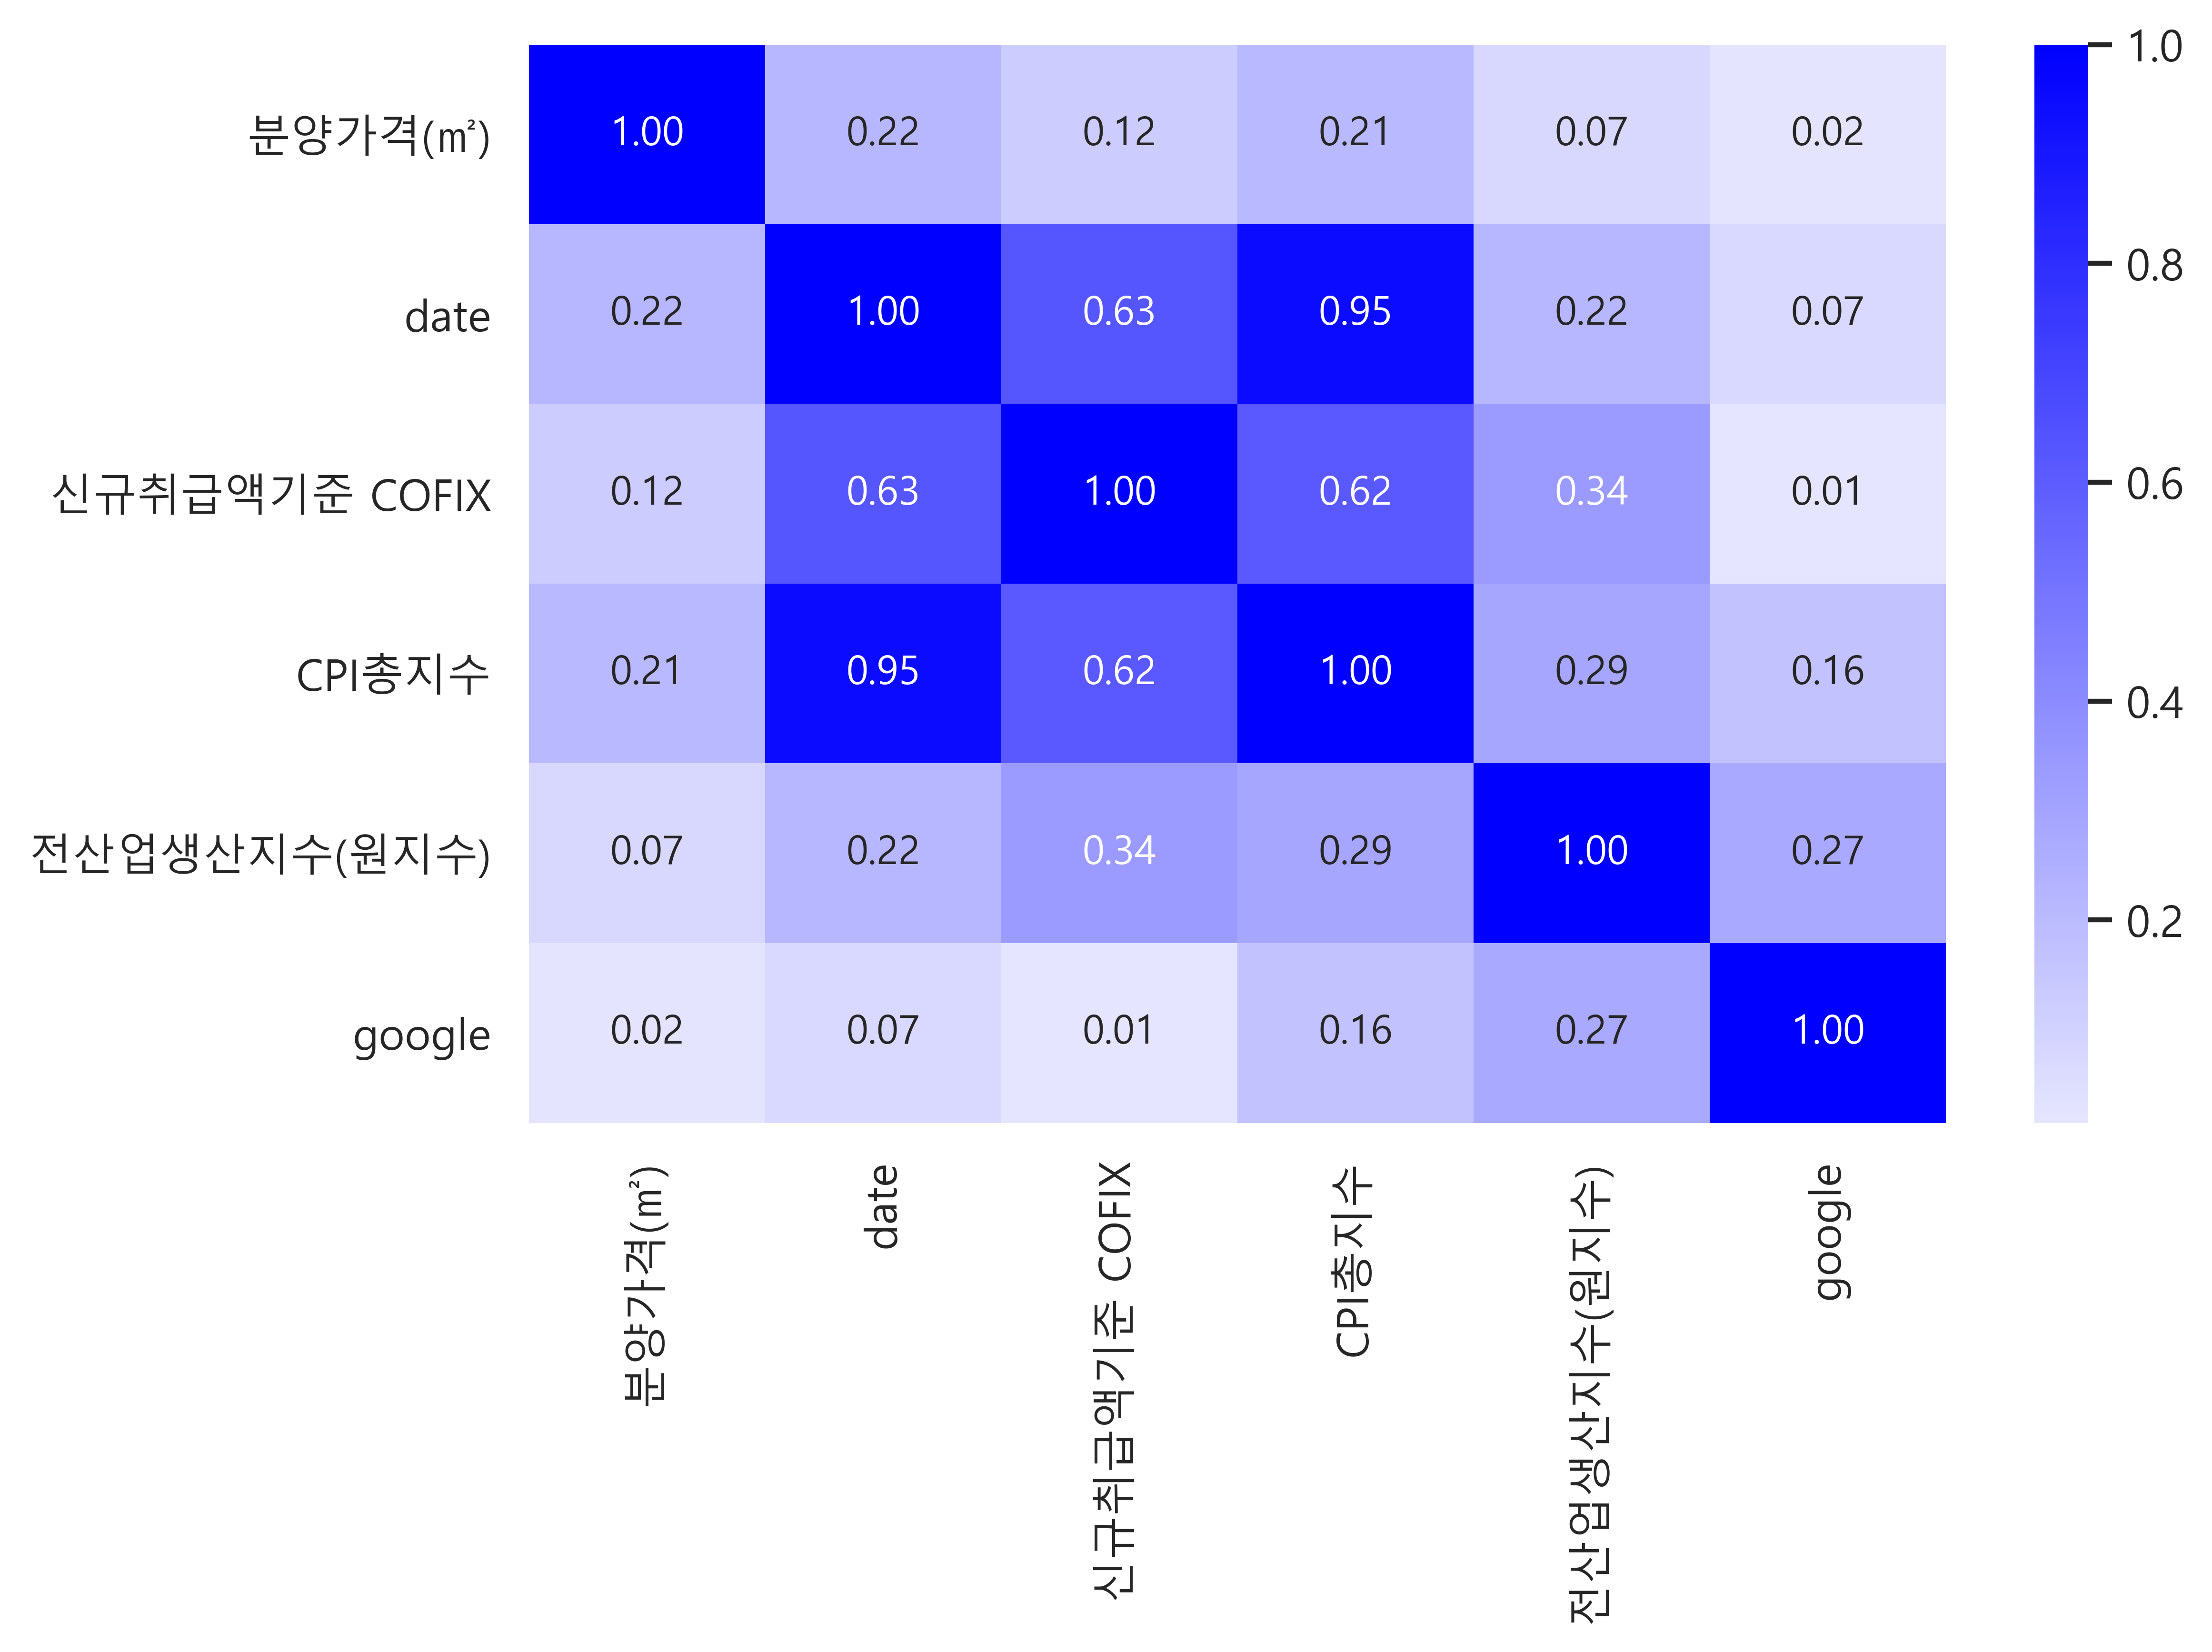

In [26]:
sns.heatmap(master_table1_corr, cmap=sns.light_palette(
    "blue", as_cmap=True), annot=True, fmt=".2f")
plt.show()

##### 결론 1
    - cpi 총지수가 분양가격과 가장 높은 상관을 보인다.

#### - **연구문제 2** : 지역별 분양가격의 차이를 확인한다.
- 각 지역별 분양가격의 평균을 도출하고 시간대별로 나열하여 본다.

In [27]:
result_pv=master_table.pivot_table("분양가격(㎡)",["date"],["지역명"], aggfunc=np.mean)
result_pv.index=result_pv.index.astype("str")
result_pv.tail(2)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
date,,,,,,,,,,,,,,,,,
201908,2738.8,4798.8,3235.80,2731.6,3795.0,4369.8,3658.25,4179.2,9294.4,3573.5,NaN,4130.0,2497.6,2606.0,3789.5,2681.75,2346.4
201909,2809.8,4868.4,3369.75,2792.4,3795.0,4475.4,3730.50,4187.0,9312.4,3573.5,2732.0,4130.0,2563.4,2606.0,3789.5,2599.75,2391.6


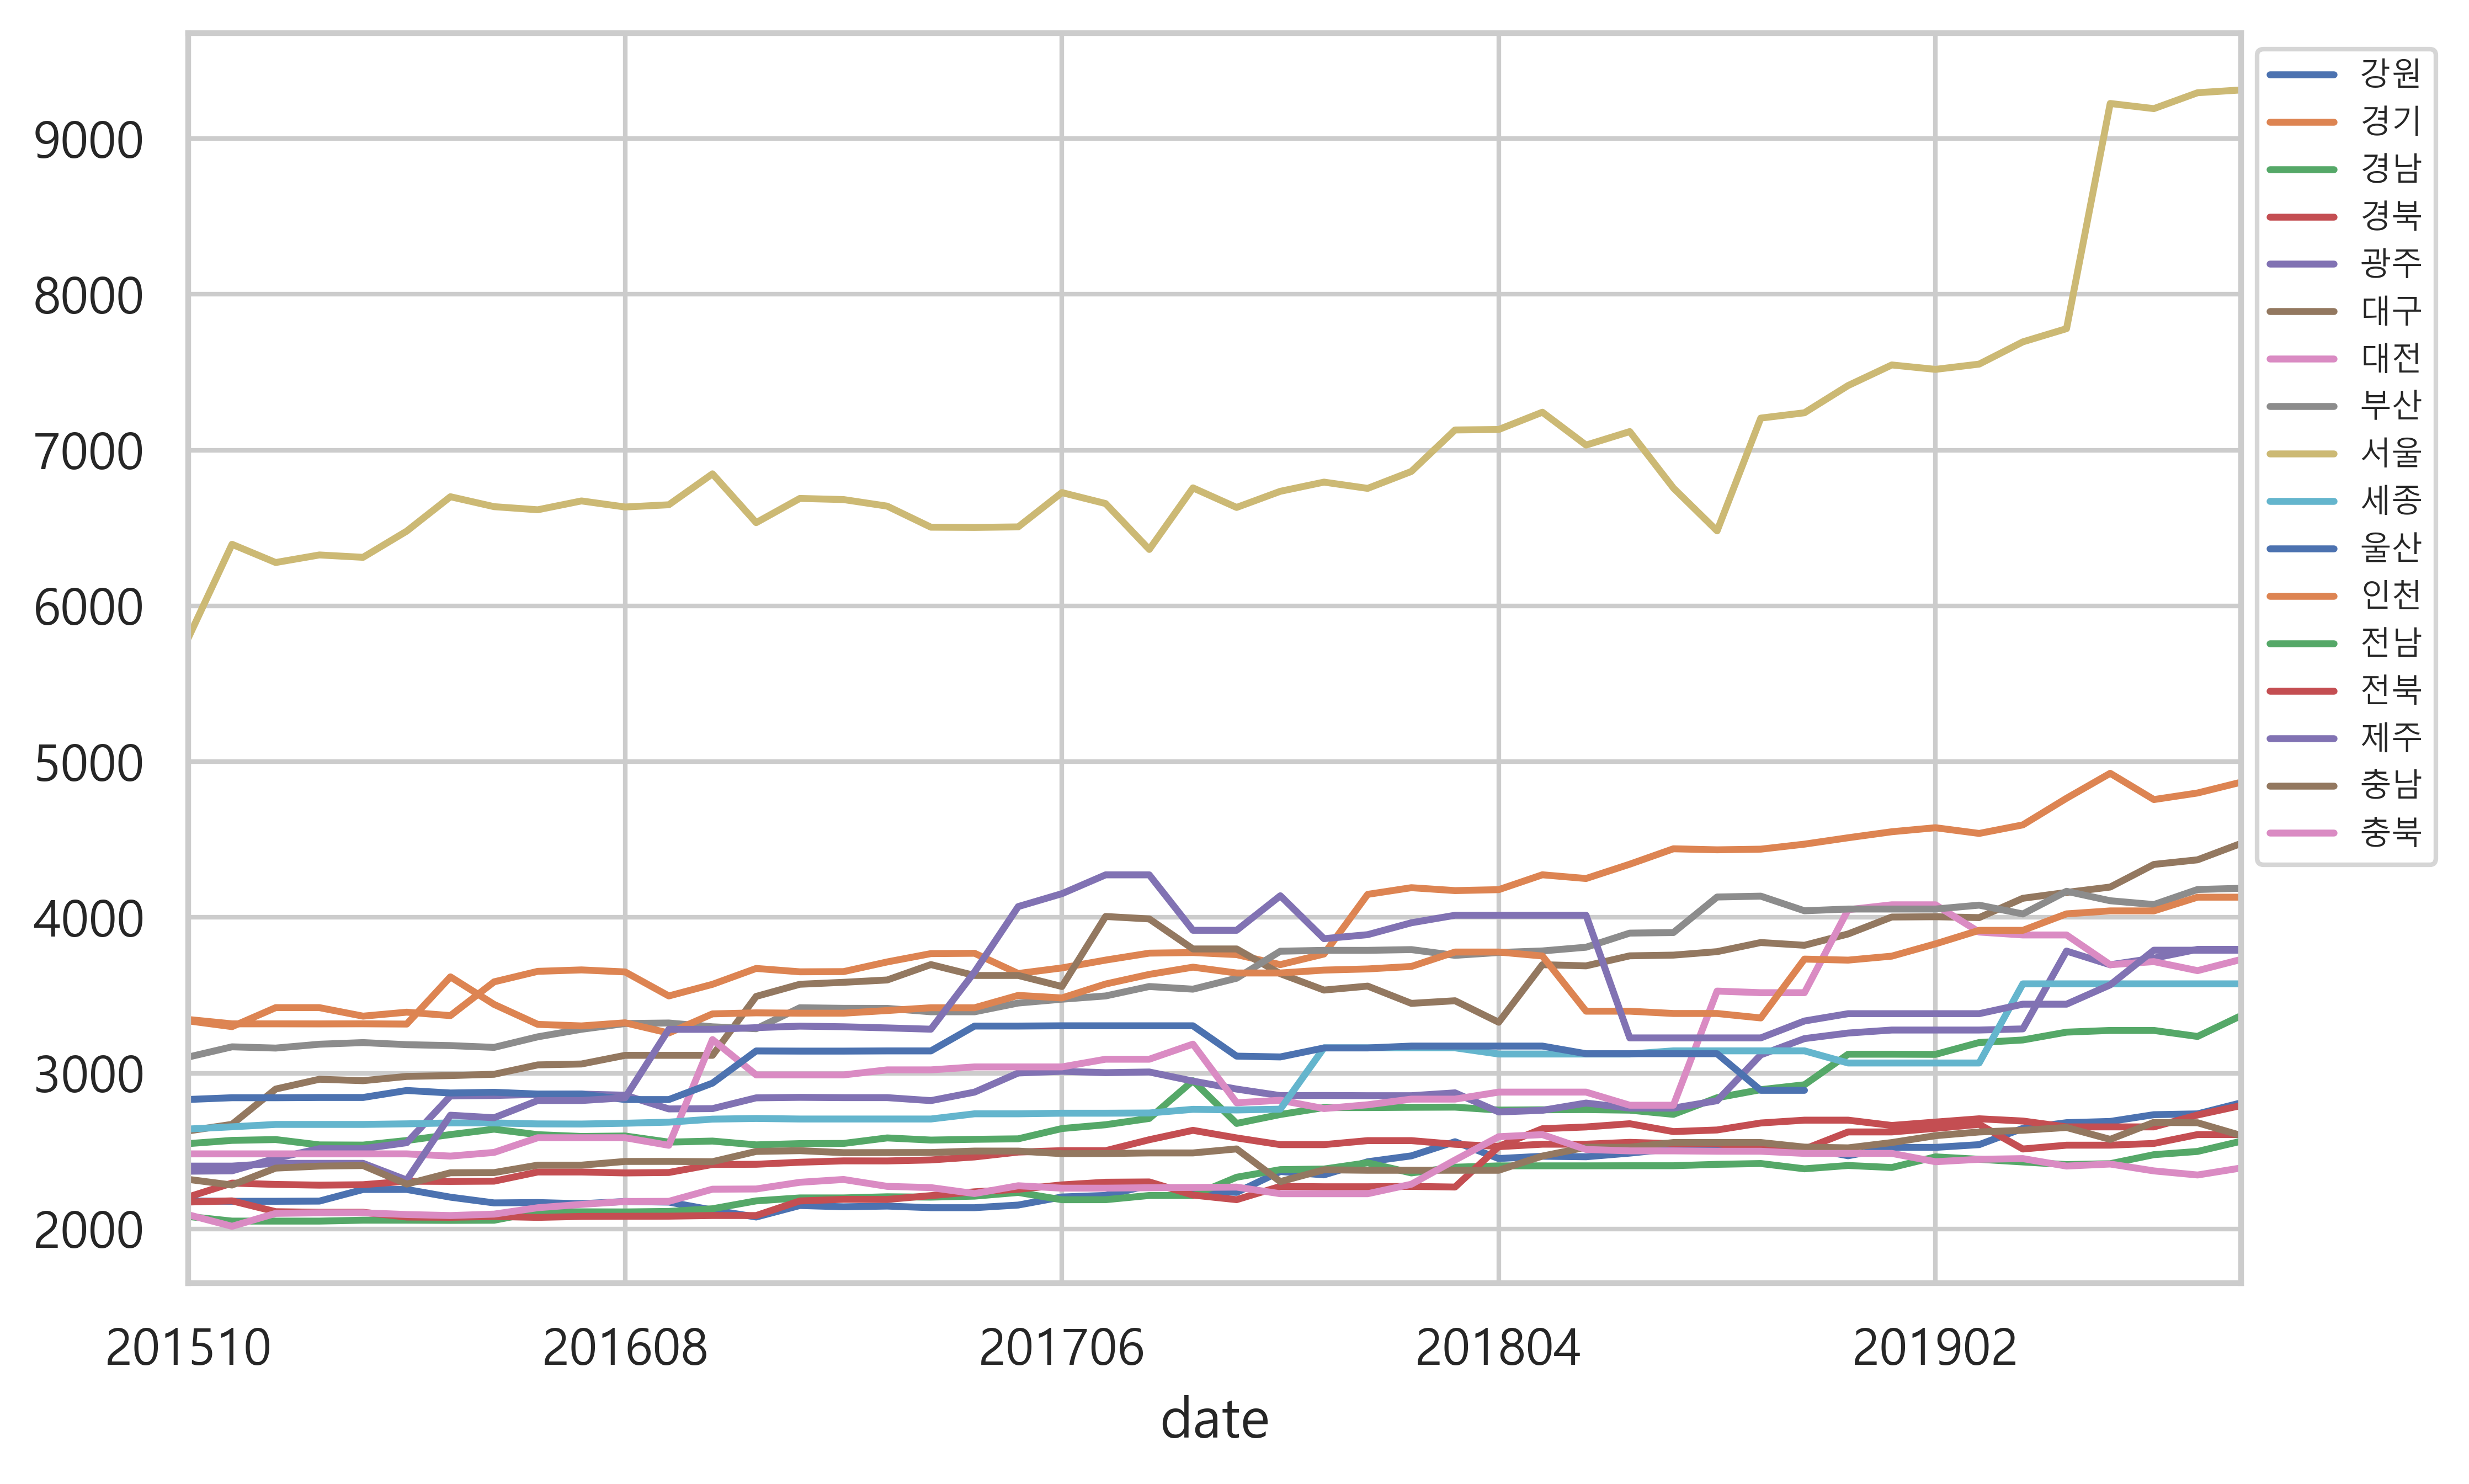

In [28]:
result_pv.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='x-small')
plt.show()

##### 결론 2 
    - 그래프를 통해 다른 지역에 비해 서울 지역의 분양가격이 높다는 것을 확인 할 수 있다.

[목차로 돌아가기](#목차)

### 6.2 선형회귀모형 및 성능평가

#### 6.2.1 데이터 추출
##### 지역명:서울, 규모구분:전체 

In [29]:
seoul=master_table[(master_table["규모구분"]=="전체")&(master_table["지역명"]=="서울")]
seoul=seoul[["분양가격(㎡)","date","신규취급액기준 COFIX","CPI총지수","전산업생산지수(원지수)","google"]]
seoul.tail(2)

,분양가격(㎡),date,신규취급액기준 COFIX,CPI총지수,전산업생산지수(원지수),google
3650,8093,201908,1.52,105.21,105.4,15.5
3725,8085,201909,1.57,105.57,105.3,33.2


##### 지역명: 서울,경기 규모구분:전체

In [30]:
seoul_gyunggi=master_table[master_table["규모구분"]=="전체"]
a=seoul_gyunggi[(seoul_gyunggi["지역명"]=="서울")|(seoul_gyunggi["지역명"]=="경기")]

seoul_gyunggi=a[["분양가격(㎡)","date","신규취급액기준 COFIX","CPI총지수","전산업생산지수(원지수)","google"]]
seoul_gyunggi.tail(2)

,분양가격(㎡),date,신규취급액기준 COFIX,CPI총지수,전산업생산지수(원지수),google
3725,8085,201909,1.57,105.57,105.3,33.2
3735,4441,201909,1.57,105.57,105.3,33.2


#### 지역 및 규모를 dummy변수화

In [31]:
one_hot_result= pd.get_dummies(master_table["지역명"])
one_hot_result2= pd.get_dummies(master_table["규모구분"])
one_hot_result2.tail(2)

,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
3800,0,0,1,0,0
3801,1,0,0,0,0


In [32]:
one_hot_final=pd.concat([master_table,one_hot_result,one_hot_result2],axis=1)
one_hot_final=one_hot_final[one_hot_final['전체']==0]
one_hot_final=one_hot_final[['분양가격(㎡)', 'date', '신규취급액기준 COFIX', 'CPI총지수',
       '전산업생산지수(원지수)', 'google', '강원', '경기', '경남', '경북', '광주', '대구', '대전',
       '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북',
       '전용면적 102㎡초과', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       ]]
one_hot_final.tail(2)

,분양가격(㎡),date,신규취급액기준 COFIX,CPI총지수,전산업생산지수(원지수),google,강원,경기,경남,경북,...,인천,전남,전북,제주,충남,충북,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하
3800,3884,201909,1.57,105.57,105.3,33.2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3801,3601,201909,1.57,105.57,105.3,33.2,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


#### 6.2.2 모델화 및 성능 평가

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [57]:
# 각 데이터의 독립변수와 종속변수 구분
seoul_x = seoul[seoul.columns[1:]]  #독립변수
seoul_y = seoul['분양가격(㎡)']  #종속변수()
seoul_gyunggi_x = seoul_gyunggi[seoul_gyunggi.columns[1:]]  #독립변수
seoul_gyunggi_y = seoul_gyunggi['분양가격(㎡)']  #종속변수()
dummy_x = one_hot_final[one_hot_final.columns[1:]]  #독립변수
dummy_y = one_hot_final['분양가격(㎡)']  #종속변수

In [64]:
def linear_model(x,y):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=1)
    model = LinearRegression(fit_intercept=True) 
    # 모형 추정(상수항 결합을 자동으로 해줌)
    model= model.fit(train_x, train_y)
    # test하는 독립변수값을 넣었을때 예측된 분양가격 데이터
    pred_y= model.predict(test_x)
    # Mean Absolute Error(MAE)
    mae = mean_absolute_error(test_y, pred_y)
    #R-Square(결정계수): 회귀분석 모델의 적합도.
    # 0~1 값을 가지는데, 1에 가까울수록 적합도가 높다
    score = model.score(test_x, test_y)
    return "test_x 예측결과 :", ([round(i)for i in pred_y][:5]), "예측 오차 : ", round(mae), "R-Square : ", round(score,3)


In [65]:
a = linear_model(seoul_x,seoul_y)
b = linear_model(seoul_gyunggi_x,seoul_gyunggi_y)
c = linear_model(dummy_x,dummy_y)
print("서울", a)
print("서울+경기", b)
print("더미", c)

서울 ('test_x 예측결과 :', [7138.0, 6564.0, 7175.0, 6908.0, 5670.0], '예측 오차 : ', 288.0, 'R-Square : ', 0.62)
서울+경기 ('test_x 예측결과 :', [5151.0, 5034.0, 5123.0, 5492.0, 5990.0], '예측 오차 : ', 1589.0, 'R-Square : ', -0.042)
더미 ('test_x 예측결과 :', [3334.0, 2739.0, 2536.0, 2605.0, 2392.0], '예측 오차 : ', 253.0, 'R-Square : ', 0.917)


In [70]:
# 서울 모델(a)의 추정된 가중치
train_x, test_x, train_y, test_y = train_test_split(seoul_x,seoul_y, test_size=0.1, random_state=1)
model = LinearRegression(fit_intercept=True) 
model= model.fit(train_x, train_y)
pred_y= model.predict(test_x)
col=["date","신규취급액기준 COFIX","CPI총지수","전산업생산지수(원지수)","google"]
coefs = pd.DataFrame(zip(col, model.coef_),columns = ["features","coefficients"])
coefs

,features,coefficients
0,date,7.974197
1,신규취급액기준 COFIX,-320.059949
2,CPI총지수,-214.804599
3,전산업생산지수(원지수),15.246677
4,google,-0.501512


In [72]:
# 더미변수 포함된 모델(c)이 추정된 가중치
train_x, test_x, train_y, test_y = train_test_split(dummy_x,dummy_y, test_size=0.1, random_state=1)
model = LinearRegression(fit_intercept=True) 
model= model.fit(train_x, train_y)
pred_y= model.predict(test_x)
col=[ 'date', '신규취급액기준 COFIX', 'CPI총지수',
       '전산업생산지수(원지수)', 'google', '강원', '경기', '경남', '경북', '광주', '대구', '대전',
       '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북',
       '전용면적 102㎡초과', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       ]
coefs = pd.DataFrame(zip(col, model.coef_),columns = ["features","coefficients"])
coefs

,features,coefficients
0,date,2.526907
1,신규취급액기준 COFIX,-242.730948
2,CPI총지수,-10.500786
3,전산업생산지수(원지수),9.256322
4,google,0.309528
5,강원,-849.083983
6,경기,797.240934
7,경남,-403.165672
8,경북,-677.643159
9,광주,-240.905804


##### 결론 3
    - 금리, 소비자물가지수, 산업생산지수, 부동산 정책에 관한 이슈를 기반으로 아파트 분양가격에 영향을 미치며,선형회귀분석을 통해 가격을 설명할 수 있다.
    - model.predict를 사용하면 아파트 가격을 예측할 수 있다
    - 서울 모델링과 서울&경기 모델링 한 결과를 비교하면 후자의 경우 MAE가 더 커진것을 알 수 있다.
    - 그 이유는 지역별 분양가격에서 힌트를 찾을 수 있다.
    - 추가적으로 지역 및 규모를 더미 변수화 하여 회귀모델을 도출하였을 때 더 좋은 예측이 가능함을 알 수 있다.
   
 

[목차로 돌아가기](#목차)

## 7. 제언
- 분양가에 영향을 주는 변수를 찾기위해 상관관계만을 확인한 것이 아쉬운 점으로 남는다. 차후 회귀검정을 통해 더욱 정밀한 분석이 필요해 보인다.
- 날짜 데이터의 특수성을 비롯해 더미 변수 사용 등 각 지수에 대한 정규화가 이루어지지 않았다는 점 또한 본 프로젝트의 아쉬운점으로 남는다. 차후 정규화를 바탕으로 더 정밀한 결과를 도출할 필요가 있어 보인다.
- 본 프로젝트에서 제안한 독립변수 외에 분양가에 영향을 주는 변수가 더 많이 존재할 수 있다. 차후 더 많은 독립변수를 고려한 분석이 필요해 보인다.


[목차로 돌아가기](#목차)

![thank you](images/thankyou.png)